# Loading all necessary packages

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

from pulp import LpVariable, LpProblem, LpMinimize, lpSum, value, LpStatus


# Part 1 - Import and preprocess
1. Read Excel file and set column 0 as index
2. Dropping empty lines
3. Keeping a copy of the raw data in `df_raw`
4. Normalizing data in `df`

In [27]:
# Read in Data using pandas
df_raw = pd.read_excel('Exercise3_data.xlsx', index_col=0)

# Dropping empty lines
df_raw = df_raw.drop(df_raw.index[0:3])
df = df_raw.copy()

# normalize by column
df = (df - df.min()) / (df.max() - df.min())

df

,Distance,Cost,LO,Water,GWP,FWET,FWEU,HT,PMPF,POFP,TA,TE
BD20 algae,1.0,0.661017,0.003428,0.02439,0.97166,0.324324,0.223653,0.253165,0.387805,0.534848,0.628959,0.649123
BD20 Camelina,1.0,0.559322,0.195373,0.117517,0.927126,0.201201,0.032787,0.063291,0.209756,0.386364,0.473605,0.54386
BD20 canola,1.0,0.610169,0.101971,0.064302,0.927126,0.201201,0.038642,0.063291,0.197561,0.356061,0.455505,0.596491
BD20 corn,1.0,0.525424,0.312768,0.137472,0.959514,0.231231,0.045667,0.075949,0.285366,0.522727,0.556561,0.508772
BD20 Jatropha,1.0,0.525424,0.093402,0.055432,0.94332,0.231231,0.038642,0.075949,0.236585,0.431818,0.505279,0.508772
...,...,...,...,...,...,...,...,...,...,...,...,...
RDII canola,0.923077,0.771186,0.520137,0.32816,0.032389,0.162162,0.067916,0.037975,0.043902,0.087879,0.033183,0.763158
RDII corn,0.923077,0.29661,0.841474,0.055432,0.165992,0.339339,0.096019,0.113924,0.421951,0.822727,0.461538,0.27193
RDII Jatropha,0.923077,0.288136,0.474722,0.280488,0.11336,0.327327,0.069087,0.088608,0.243902,0.477273,0.285068,0.263158
RDII palm,0.923077,0.491525,0.239075,1.0,0.0,0.144144,0.038642,0.012658,0.080488,0.190909,0.095023,0.473684


# Part 2 - Hierarchical clustering
1. Single linkage
2. Ward
3. Complete linkage

Text(0.5, 1.0, 'Single linkage')

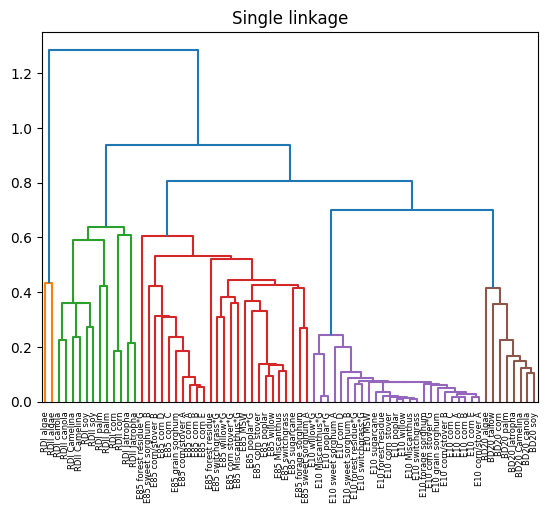

In [76]:
single = hierarchy.linkage(df,'single') # doing the clustering with 'single'
hierarchy.dendrogram(single, labels=df.index, leaf_rotation=90, color_threshold=0.65)   # drawing the dendrogram
plt.title('Single linkage') # giving a title to the plot

Text(0.5, 1.0, 'Ward')

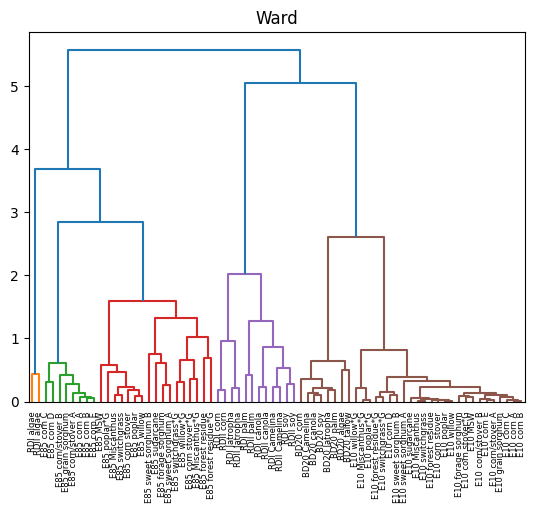

In [80]:
ward=hierarchy.linkage(df,'ward') # doing the clustering with 'ward'
hierarchy.dendrogram(ward, labels=df.index, leaf_rotation=90, color_threshold=2.8)   # drawing the dendrogram
plt.title('Ward')   # giving a title to the plot

Text(0.5, 1.0, 'Complete linkage')

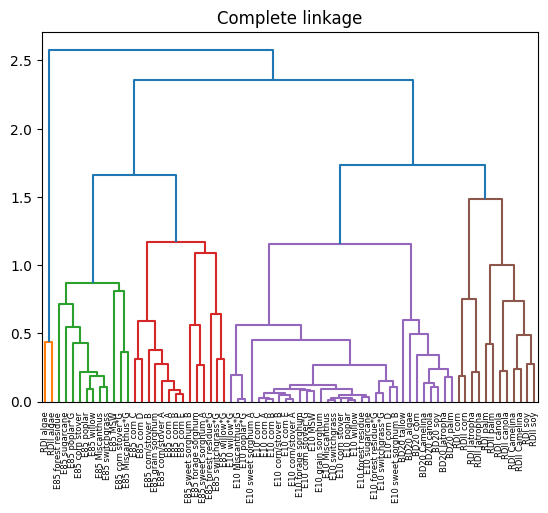

In [82]:
complete = hierarchy.linkage(df,'complete') # doing the clustering with 'complete'
hierarchy.dendrogram(complete, labels=df.index, leaf_rotation=90, color_threshold=1.5)   # drawing the dendrogram
plt.title('Complete linkage')   # giving a title to the plot

## Task II & III
Hierarchical clustering, particularly using single linkage, shows that the five fuel types (E85, E110, RDI, RDI algae, BD20) naturally form their own groups because of their properties. This supports choosing five clusters, one for each fuel type. Using average linkage gives a similar picture. The category of fuel within the name can be used for the cluster names.

# Part 3 - k-means clustering
1. Setting number of clusters based on part 2
2. k-means based on hierarchical seeding
3. k-means startin with random seeds

In [67]:
n_cluster = 5   # number of clusters

# Calculating initial centroids using Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
agg_labels = agg_clustering.fit_predict(df)
centroids = np.array([df[agg_labels == i].mean(axis=0) for i in range(n_clusters)])

centroids

array([[0.9230769230769232, 0.46327683615819204, 0.6441730934018851,
        0.373429416112343, 0.11673414304993253, 0.20395395395395396,
        0.05776736924277907, 0.04746835443037975, 0.14207317073170736,
        0.2946969696969697, 0.15623428858722976, 0.4444444444444444],
       [0.0, 0.17864406779661013, 0.15578406169665812,
        0.14766740576496676, 0.3982186234817814, 0.5268468468468468,
        0.14903981264637, 0.25518987341772154, 0.338829268292683,
        0.5371515151515149, 0.6137556561085974, 0.18157894736842095],
       [0.32307692307692293, 0.48372881355932207, 0.013127677806341047,
        0.01942350332594235, 0.9250202429149798, 0.11159159159159157,
        0.04505854800936768, 0.029367088607594932, 0.18682926829268298,
        0.25569696969696964, 0.47867269984917044, 0.4284210526315789],
       [0.9230769230769231, 0.9449152542372881, 0.017994858611825194,
        0.02716186252771619, 0.3157894736842105, 0.7702702702702702,
        0.9197892271662763, 0.9177215

In [72]:
# Scenario 1: Hierarchical Seeding
kmeans_seed = KMeans(n_clusters=n_clusters, init=centroids, n_init=1)
kmeans_seed_labels = kmeans_seed.fit_predict(df)

# Calculating Cluster Centers and Inertia for Scenario 1
cluster_centers_1 = kmeans_seed.cluster_centers_
inertia_1 = kmeans_seed.inertia_

# Assigning data point names (indices) to clusters
cluster_members_1 = {i: [] for i in range(n_clusters)}
for i, label in enumerate(kmeans_seed_labels):
    cluster_members_1[label].append(df.index[i])

# cluster_centers_1
# cluster_members_1

for i in range(n_clusters):
    print(f"\nCluster {i}:")
    print(cluster_members_1[i])


Cluster 0:
['RDI Camelina', 'RDI canola', 'RDI corn', 'RDI\xa0Jatropha', 'RDI\xa0palm', 'RDI\xa0soy', 'RDII\xa0Camelina', 'RDII canola', 'RDII corn', 'RDII Jatropha', 'RDII palm', 'RDII soy']

Cluster 1:
['E85 corn A', 'E85 corn B', 'E85 corn C', 'E85 corn D', 'E85 corn E', 'E85 corn stover', 'E85 corn stover*G', 'E85 corn/stover A', 'E85 corn/stover B', 'E85 forage sorghum', 'E85 forest residue', 'E85 forest residue*G', 'E85 grain sorghum', 'E85 Miscanthus', 'E85 Miscanthus*G', 'E85 MSW', 'E85 poplar', 'E85 poplar*G', 'E85 sugarcane', 'E85 sweet sorghum A', 'E85 sweet sorghum B', 'E85 switchgrass', 'E85 switchgrass*G', 'E85 willow', 'E85 willow*G']

Cluster 2:
['E10 corn A', 'E10 corn B', 'E10 corn C', 'E10 corn D', 'E10 corn E', 'E10 corn stover', 'E10 corn stover*G', 'E10 corn/stover A', 'E10 corn/stover B', 'E10 forage sorghum', 'E10 forest residue', 'E10 forest residue*G', 'E10 grain sorghum', 'E10 Miscanthus', 'E10 Miscanthus*G', 'E10 MSW', 'E10 poplar', 'E10 poplar*G', 'E10 sug

#### Hierarchical Seeding
The cluster names could be: RDI, E85, E10, BD20
Only one cluster is a bit tricky, since it only contains RDI algae and RDII algae, it could be named RD algae

In [71]:
# Scenario 1: Random Seeding
kmeans_rnd = KMeans(n_clusters=n_clusters, init='random',n_init=10)
kmeans_rnd_labels = kmeans_rnd.fit_predict(df)

# Calculating Cluster Centers and Inertia for Scenario 2
cluster_centers_2 = kmeans_rnd.cluster_centers_
inertia_2 = kmeans_rnd.inertia_

# Assigning data point names (indices) to clusters
cluster_members_2 = {i: [] for i in range(n_clusters)}
for i, label in enumerate(kmeans_rnd_labels):
    cluster_members_2[label].append(df.index[i])

# cluster_centers_2
# cluster_members_2

for i in range(n_clusters):
    print(f"\nCluster {i}:")
    print(cluster_members_2[i])


Cluster 0:
['RDI Camelina', 'RDI canola', 'RDI corn', 'RDI\xa0Jatropha', 'RDI\xa0palm', 'RDI\xa0soy', 'RDII\xa0Camelina', 'RDII canola', 'RDII corn', 'RDII Jatropha', 'RDII palm', 'RDII soy']

Cluster 1:
['RDI algae', 'RDII\xa0algae']

Cluster 2:
['E10 corn A', 'E10 corn B', 'E10 corn C', 'E10 corn D', 'E10 corn E', 'E10 corn stover', 'E10 corn stover*G', 'E10 corn/stover A', 'E10 corn/stover B', 'E10 forage sorghum', 'E10 forest residue', 'E10 forest residue*G', 'E10 grain sorghum', 'E10 Miscanthus', 'E10 Miscanthus*G', 'E10 MSW', 'E10 poplar', 'E10 poplar*G', 'E10 sugarcane', 'E10 sweet sorghum A', 'E10 sweet sorghum B', 'E10 switchgrass', 'E10 switchgrass*G', 'E10 willow', 'E10 willow*G']

Cluster 3:
['E85 corn A', 'E85 corn B', 'E85 corn C', 'E85 corn D', 'E85 corn E', 'E85 corn stover', 'E85 corn stover*G', 'E85 corn/stover A', 'E85 corn/stover B', 'E85 forage sorghum', 'E85 forest residue', 'E85 forest residue*G', 'E85 grain sorghum', 'E85 Miscanthus', 'E85 Miscanthus*G', 'E85 M

#### Random Seeding
The cluster seem a bit mixed up in this case. The RDI algae and RDII algae is still it's own cluster but the others are mixed compared to the previous. The E85 cluster remained, so this can be named E85 again.

# Part 4 - DEA

In [152]:
df_dea = df.copy()

# all inputs - excluding distance, as I think this metric should not be minimized in this case
input_cols = ['Cost', 'LO', 'Water', 'GWP', 'FWET', 'FWEU', 'HT', 'PMPF', 'POFP', 'TA', 'TE']
# outputs
output_cols = ['Output']

X = df_dea[input_cols].values  # inputs matrix
num_dmus = X.shape[0]
num_inputs = X.shape[1]
num_outputs = 1

# initialize a Y matrix
Y = np.ones((num_dmus, num_outputs))

dmu_names = df_dea.index.tolist() # get DMU names

print(f"\nNumber of DMUs: {num_dmus}")
print(f"Number of Inputs: {num_inputs} ({', '.join(input_cols)})")
print(f"Number of Outputs: {num_outputs}")


# solve LP for each dmu
efficiency_scores = np.zeros(num_dmus)
lambdas = np.zeros((num_dmus, num_dmus))
input_slacks = np.zeros((num_dmus, num_inputs))
output_slacks = np.zeros((num_dmus, num_outputs))

for k in range(num_dmus):  # Iterate through each dmu
    # define problem
    prob = LpProblem(f"DEA_DMU_{k}", LpMinimize)

    # define decision variables
    theta = LpVariable(f"theta_{k}", lowBound=0) # efficiency score
    lambda_vars = [LpVariable(f"lambda_{k}_{j}", lowBound=0) for j in range(num_dmus)] # lambda

    # objective function
    prob += theta

    # define constraints
    # input constraints - sum(lambda_j * x_ij) <= theta * x_ik
    for i in range(num_inputs):
        prob += lpSum(lambda_vars[j] * X[j, i] for j in range(num_dmus)) <= theta * X[k, i], f"Input_{i}_Constraint"

    # output constraints - sum(lambda_j * y_rj) >= y_rk (here y_rj=1 and y_rk=1)
    for r in range(num_outputs):
        prob += lpSum(lambda_vars[j] * Y[j, r] for j in range(num_dmus)) >= Y[k, r], f"Output_{r}_Constraint"

    # VRS constraint: sum(lambda_j) = 1
    prob += lpSum(lambda_vars[j] for j in range(num_dmus)) == 1, "VRS_Constraint"

    # solve the problem
    prob.solve(solver=None)

    # store results
    efficiency_scores[k] = value(theta)
    for j in range(num_dmus):
        # handle potential none values
        lambda_val = value(lambda_vars[j])
        lambdas[k, j] = lambda_val if lambda_val is not None else 0.0

    # calculate slacks directly using optimal values
    theta_star = efficiency_scores[k]
    lambda_star = lambdas[k, :]

    projected_inputs = np.dot(lambda_star, X)
    projected_outputs = np.dot(lambda_star, Y) # this will be 1 if sum(lambda)=1

    input_slacks[k, :] = (theta_star * X[k, :]) - projected_inputs
    # calculate output slack for the single output
    output_slacks[k, :] = projected_outputs - Y[k, :] # should be close to 0 if sum(lambda)=1

    print(f"dmu {k} ({dmu_names[k]}): status={LpStatus[prob.status]}, theta={efficiency_scores[k]:.4f}")



Number of DMUs: 72
Number of Inputs: 11 (Cost, LO, Water, GWP, FWET, FWEU, HT, PMPF, POFP, TA, TE)
Number of Outputs: 1
dmu 0 (BD20 algae): status=Optimal, theta=0.5482
dmu 1 (BD20 Camelina): status=Optimal, theta=0.7751
dmu 2 (BD20 canola): status=Optimal, theta=0.7504
dmu 3 (BD20 corn): status=Optimal, theta=0.6912
dmu 4 (BD20 Jatropha): status=Optimal, theta=0.7471
dmu 5 (BD20 palm): status=Optimal, theta=0.8057
dmu 6 (BD20 tallow): status=Optimal, theta=1.0000
dmu 7 (BD20 soy): status=Optimal, theta=0.9714
dmu 8 (E10 corn A): status=Optimal, theta=0.9398
dmu 9 (E10 corn B): status=Optimal, theta=0.9485
dmu 10 (E10 corn C): status=Optimal, theta=0.9618
dmu 11 (E10 corn D): status=Optimal, theta=0.7377
dmu 12 (E10 corn E): status=Optimal, theta=0.8882
dmu 13 (E10 corn stover): status=Optimal, theta=0.9906
dmu 14 (E10 corn stover*G): status=Optimal, theta=0.8580
dmu 15 (E10 corn/stover A): status=Optimal, theta=0.9360
dmu 16 (E10 corn/stover B): status=Optimal, theta=0.8652
dmu 17 (E

In [154]:
results_df = pd.DataFrame(index=dmu_names) # Use DMU names as index
results_df['Efficiency_Score (theta)'] = efficiency_scores

# add lambda columns
for j in range(num_dmus):
    results_df[f'lambda_{dmu_names[j]}'] = lambdas[:, j] # Use DMU names in lambda column headers

# add input slack columns
for i in range(num_inputs):
    results_df[f's_minus_{input_cols[i]}'] = input_slacks[:, i]

# add output slack columns
for r in range(num_outputs):
    results_df[f's_plus_{output_cols[r]}'] = output_slacks[:, r]

# Determine efficient routes
results_df['Is_Efficient'] = (np.isclose(results_df['Efficiency_Score (theta)'], 1.0)) & \
                             (np.all(np.isclose(input_slacks, 0), axis=1)) & \
                             (np.all(np.isclose(output_slacks, 0), axis=1))


print("\nEfficiency Scores and Status:")
print(results_df[['Efficiency_Score (theta)', 'Is_Efficient']])

# Save the full table to a CSV file to view all columns
results_df.to_csv('dea_results.csv')

# --- Identify Efficient Routes ---
efficient_routes = results_df[results_df['Is_Efficient']].index.tolist()
print(f"\nEfficient Routes ({len(efficient_routes)}):")
print(efficient_routes)




Efficiency Scores and Status:
               Efficiency_Score (theta)  Is_Efficient
BD20 algae                     0.548178         False
BD20 Camelina                  0.775056         False
BD20 canola                    0.750406         False
BD20 corn                      0.691217         False
BD20 Jatropha                  0.747144         False
...                                 ...           ...
RDII canola                    1.000000          True
RDII corn                      1.000000          True
RDII Jatropha                  1.000000          True
RDII palm                      1.000000          True
RDII soy                       1.000000          True

[72 rows x 2 columns]

Efficient Routes (28):
['BD20 tallow', 'E10 forest residue', 'E10 MSW', 'E10 sweet sorghum A', 'E10 willow', 'E10 willow*G', 'E85 corn stover', 'E85 corn stover*G', 'E85 forest residue', 'E85 forest residue*G', 'E85 Miscanthus', 'E85 Miscanthus*G', 'E85 MSW', 'E85 poplar', 'E85 poplar*G', 'E85 wi

In [161]:
# find inefficient routes
inefficient_routes = results_df[~results_df['Is_Efficient']].index.tolist()
print(inefficient_routes)

# selecting the first two inefficient routes for demonstration
selected_inefficient_routes = ['BD20 algae', 'BD20 Camelina']


for idx, ineff_route in enumerate(selected_inefficient_routes):
    print(f"Route {idx+1}: {ineff_route}")

    dmu_idx = dmu_names.index(ineff_route)
    efficiency = efficiency_scores[dmu_idx]

    print(f"Efficiency Score: {efficiency:.4f}")

    peer_indices = np.where(lambdas[dmu_idx, :] > 1e-6)[0]
    peer_group = [dmu_names[j] for j in peer_indices]
    peer_lambdas = [lambdas[dmu_idx, j] for j in peer_indices]

    for i, peer in enumerate(peer_group):
        print(f"  - {peer} (λ = {peer_lambdas[i]:.4f})")

    current_inputs = X[dmu_idx, :]
    current_outputs = Y[dmu_idx, :]

    input_target = efficiency * current_inputs - input_slacks[dmu_idx, :]
    output_target = current_outputs + output_slacks[dmu_idx, :]

    print("Inputs:")
    for i, col in enumerate(input_cols):
        print(f"  - {col}: Current = {current_inputs[i]:.4f}, Target = {input_target[i]:.4f}, Reduction = {current_inputs[i] - input_target[i]:.4f} ({(1 - input_target[i]/current_inputs[i])*100:.2f}%)")

    print("Outputs:")
    for i, col in enumerate(output_cols):
        print(f"  - {col}: Current = {current_outputs[i]:.4f}, Target = {output_target[i]:.4f}, Increase = {output_target[i] - current_outputs[i]:.4f} ({(output_target[i]/current_outputs[i] - 1)*100:.2f}%)")



['BD20 algae', 'BD20 Camelina', 'BD20 canola', 'BD20 corn', 'BD20 Jatropha', 'BD20 palm', 'BD20 soy', 'E10 corn A', 'E10 corn B', 'E10 corn C', 'E10 corn D', 'E10 corn E', 'E10 corn stover', 'E10 corn stover*G', 'E10 corn/stover A', 'E10 corn/stover B', 'E10 forage sorghum', 'E10 forest residue*G', 'E10 grain sorghum', 'E10 Miscanthus', 'E10 Miscanthus*G', 'E10 poplar', 'E10 poplar*G', 'E10 sugarcane', 'E10 sweet sorghum B', 'E10 switchgrass', 'E10 switchgrass*G', 'E85 corn A', 'E85 corn B', 'E85 corn C', 'E85 corn D', 'E85 corn E', 'E85 corn/stover A', 'E85 corn/stover B', 'E85 forage sorghum', 'E85 grain sorghum', 'E85 sugarcane', 'E85 sweet sorghum A', 'E85 sweet sorghum B', 'E85 switchgrass', 'E85 switchgrass*G', 'RDI algae', 'RDI corn', 'RDII\xa0algae']
Route 1: BD20 algae
Efficiency Score: 0.5482
  - E10 MSW (λ = 0.1473)
  - E10 sweet sorghum A (λ = 0.3220)
  - E85 forest residue (λ = 0.0005)
  - E85 MSW (λ = 0.5281)
  - E85 poplar*G (λ = 0.0021)
Inputs:
  - Cost: Current = 0.661